# - Census Dataset - Homer Kay

In [2]:
#Add packages
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

In [1]:
# Checking Current Directory

In [2]:
# Change Directory

In [5]:
# Importing Data
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adult = pd.read_csv(url, header=None, na_values=['?'])
adult.head(10)
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'
# Skip First Row, causes encoding problems.  
adult_test = pd.read_csv(url2, header=None, na_values=['?'], skiprows=1)
adult_test.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


# EDA
- Rename Columns
- Combine Training/Test Data
- Missing Values Columns 10,11?
- Designate Target Variable
- Dummies

In [6]:
# Combining Test/Train From Website
# Decided to do this to perform EDA on entire set and train/test my own sets.  
frames = [adult, adult_test]
adult_comb = pd.concat(frames)

In [7]:
print(adult_comb.shape)
print(adult_comb.dtypes)
print(adult_comb.mean())
print()
print(adult_comb.std())

(48842, 15)
0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
14    object
dtype: object
0         38.643585
2     189664.134597
4         10.078089
10      1079.067626
11        87.502314
12        40.422382
dtype: float64

0         13.710510
2     105604.025423
4          2.570973
10      7452.019058
11       403.004552
12        12.391444
dtype: float64


In [8]:
# Rename and Count Missing Values in Columns
adult_comb.columns = ['age', 'workclass','fnlwgt', 'Education','Education#','Marital Status','Occupation','Relationship','Race','Sex','CapGain','CapLoss','Hours per week','Native Country','50K?']
#Check 0's in columns Capital Gains and Capital Losses
print('CapGain # of Non-Zeros')
print(adult_comb.CapGain.astype(bool).sum(axis=0))
print('CapLoss # of Non-Zeros')
print(adult_comb.CapLoss.astype(bool).sum(axis=0))
print('Total # of Columns')
print(adult_comb.CapGain.count())

CapGain # of Non-Zeros
4035
CapLoss # of Non-Zeros
2282
Total # of Columns
48842


### Considering the fact that CapGain and CapLoss are both zero over 90% of the time; they are missing information, and cannot be imputed.

In [9]:
#Remove Columns CapGain, CapLoss
adult_c_red = adult_comb.drop(columns=['CapGain','CapLoss'])
adult_c_red.head(10)

,age,workclass,fnlwgt,Education,Education#,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Native Country,50K?
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [10]:
#Designate Target Variable 50K?
targetName = '50K?'
targetSeries = adult_c_red[targetName]
#remove target from current location and insert in column 0
del adult_c_red[targetName]
adult_c_red.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
adult_c_red.head(10)

,50K?,age,workclass,fnlwgt,Education,Education#,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Native Country
0,<=50K,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States
1,<=50K,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
2,<=50K,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
3,<=50K,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
4,<=50K,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
5,<=50K,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States
6,<=50K,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica
7,>50K,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States
8,>50K,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States
9,>50K,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States


In [11]:
# Replace ? with NA and Remove NA Rows
adult_na = adult_c_red.replace({' ?': np.nan})
adult_red2 = adult_na.dropna()
adult_red2.head(30)
##Confirmed Missing Value Rows are Gone
adult_red2.shape

(45222, 13)

### 45,222 observations left after munging.  


                     age    fnlwgt  Education#  Hours per week
age             1.000000 -0.075792    0.037623        0.101992
fnlwgt         -0.075792  1.000000   -0.041993       -0.018679
Education#      0.037623 -0.041993    1.000000        0.146206
Hours per week  0.101992 -0.018679    0.146206        1.000000


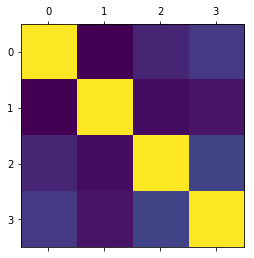

In [12]:
#Correlation Analysis on Numerical Values
# Numerical
print(adult_red2.corr())
# Visual
plt.matshow(adult_red2.corr())
# None of the variables show particularly high correlation.  

### Since Education (Num) and Education (Cat) are essentially duplicates, I just decided to drop Categorical version.  

In [13]:
# Validating Contents of Numerical and Categorical Counts in Education Variable are Identical.  
print(adult_red2['Education'].value_counts())
print(adult_red2['Education#'].value_counts())

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: Education, dtype: int64
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: Education#, dtype: int64


In [93]:
#Making Dummies
Workclass_d = pd.DataFrame(pd.get_dummies(adult_red2['workclass'])) 
Marital_d = pd.DataFrame(pd.get_dummies(adult_red2['Marital Status']))
Occupation_d = pd.DataFrame(pd.get_dummies(adult_red2['Occupation']))
Relationship_d = pd.DataFrame(pd.get_dummies(adult_red2['Relationship']))
Race_d = pd.DataFrame(pd.get_dummies(adult_red2['Race']))
Sex_d = pd.DataFrame(pd.get_dummies(adult_red2['Sex']))
NativeCountry_d = pd.DataFrame(pd.get_dummies(adult_red2['Native Country']))
fiftyK_d = pd.DataFrame(pd.get_dummies(adult_red2['50K?'])) 
print(fiftyK_d.head(10))


    <=50K   <=50K.   >50K   >50K.
0       1        0      0       0
1       1        0      0       0
2       1        0      0       0
3       1        0      0       0
4       1        0      0       0
5       1        0      0       0
6       1        0      0       0
7       0        0      1       0
8       0        0      1       0
9       0        0      1       0


In [15]:
f1 = fiftyK_d[' <=50K'].sum()
f2 = fiftyK_d[' <=50K.'].sum()
f3 = fiftyK_d[' >50K'].sum()
f4 = fiftyK_d[' >50K.'].sum()
print (f1)
print (f2)
print (f3)
print (f4)

22654
11360
7508
3700


In [16]:
# Combining Columns
fiftyK_d['<=50K'] = fiftyK_d[' <=50K'] + fiftyK_d[' <=50K.']
f5 = fiftyK_d['<=50K'].sum()
print (f5)
fiftyK_d['>50K'] = fiftyK_d[' >50K'] + fiftyK_d[' >50K.']
f6 = fiftyK_d['>50K'].sum()
print (f6)


34014
11208


### 75% of target class if biased towards <=50K.  Dataset is unbalanced.  

In [17]:
#Create DataFrames of the New Columns
LessEq_50 = pd.DataFrame(fiftyK_d['<=50K'])
Great_50 = pd.DataFrame(fiftyK_d['>50K'])

In [18]:
#Combining Dummies into Dataframe
result = pd.concat([Great_50, adult_red2, Workclass_d, Marital_d, Occupation_d, Relationship_d, Race_d, Sex_d, NativeCountry_d], axis=1)
#Remove Categorical Columns
result_red = result.drop(columns=['50K?','workclass','Marital Status','Occupation','Relationship','Race','Sex','Native Country','Education'])
print(result_red.head(10))
print(result_red.shape)


   >50K  age  fnlwgt  Education#  Hours per week   Federal-gov   Local-gov  \
0     0   39   77516          13              40             0           0   
1     0   50   83311          13              13             0           0   
2     0   38  215646           9              40             0           0   
3     0   53  234721           7              40             0           0   
4     0   28  338409          13              40             0           0   
5     0   37  284582          14              40             0           0   
6     0   49  160187           5              16             0           0   
7     1   52  209642           9              45             0           0   
8     1   31   45781          14              50             0           0   
9     1   42  159449          13              40             0           0   

    Private   Self-emp-inc   Self-emp-not-inc     ...        Portugal  \
0         0              0                  0     ...               

In [19]:
#Viewing all variables to validate none are duplicates/misnomers. 
pd.set_option('display.max_rows', 500) #Display all variables
result_red.dtypes

>50K                           uint8
age                            int64
fnlwgt                         int64
Education#                     int64
Hours per week                 int64
 Federal-gov                   uint8
 Local-gov                     uint8
 Private                       uint8
 Self-emp-inc                  uint8
 Self-emp-not-inc              uint8
 State-gov                     uint8
 Without-pay                   uint8
 Divorced                      uint8
 Married-AF-spouse             uint8
 Married-civ-spouse            uint8
 Married-spouse-absent         uint8
 Never-married                 uint8
 Separated                     uint8
 Widowed                       uint8
 Adm-clerical                  uint8
 Armed-Forces                  uint8
 Craft-repair                  uint8
 Exec-managerial               uint8
 Farming-fishing               uint8
 Handlers-cleaners             uint8
 Machine-op-inspct             uint8
 Other-service                 uint8
 

## Categorical EDA

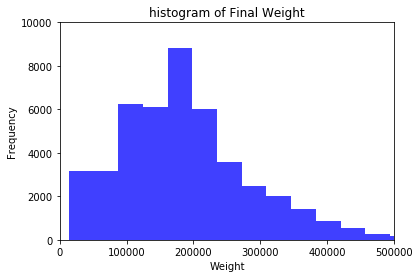

In [20]:
#weight histogram
n, bins, patches = plt.hist(result_red.fnlwgt, 40, facecolor='blue', alpha=0.75)
plt.ylim(0, 10000)
plt.xlim(0, 500000)
plt.title('histogram of Final Weight')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()

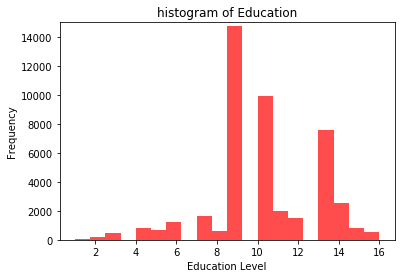

In [21]:
#education histogram
Ed = result_red['Education#']
n, bins, patches = plt.hist(Ed, 20, facecolor='red', alpha=0.7)
plt.ylim(0, 15000)
plt.title('histogram of Education')
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show()
# Education Shows peaks at HS-Grad, Some College, and Bachelors.  

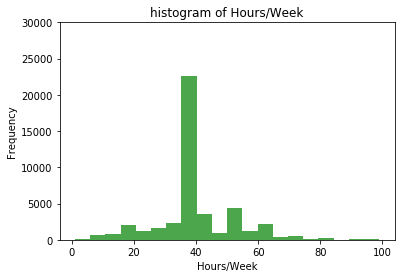

In [22]:
#Hours per week histogram
Hrs = result_red['Hours per week']
n, bins, patches = plt.hist(Hrs, 20, facecolor='green', alpha=0.7)
plt.ylim(0, 30000)
plt.title('histogram of Hours/Week')
plt.xlabel("Hours/Week")
plt.ylabel("Frequency")
plt.show()
# Clearly almost everyone entered 40 hrs/week

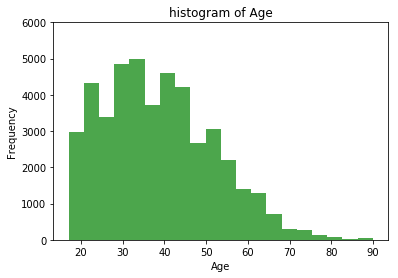

In [23]:
#age histogram
n, bins, patches = plt.hist(result_red.age, 20, facecolor='green', alpha=0.7)
plt.ylim(0, 6000)
plt.title('histogram of Age')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

                         0
Race                      
 Other                 353
 Amer-Indian-Eskimo    435
 Asian-Pac-Islander   1303
 Black                4228
 White               38903
                         0
Race                      
 Other                 353
 Amer-Indian-Eskimo    435
 Asian-Pac-Islander   1303
 Black                4228
 White               38903


Text(0,0.5,'Frequency')

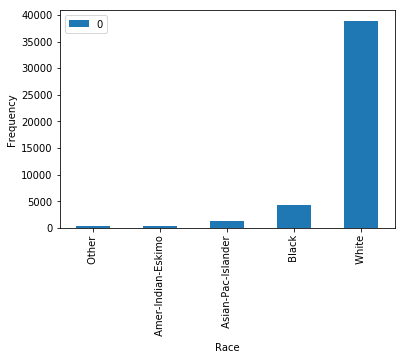

In [24]:
# Race 
ra=pd.DataFrame(adult_red2.groupby('Race').size())
ra=ra.sort_values(by=[0])
print(ra.head(10))
print(ra.tail(10))
ra.plot(kind='bar')
#plt.ylim(0, 1000)
plt.ylabel('Frequency')

             0
Sex           
 Female  14695
 Male    30527


Text(0,0.5,'Frequency')

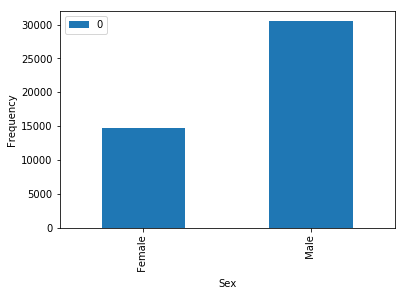

In [25]:
# Sex 
sx=pd.DataFrame(adult_red2.groupby('Sex').size())
sx=sx.sort_values(by=[0])
print(sx.head(10))
sx.plot(kind='bar')
#plt.ylim(0, 1000)
plt.ylabel('Frequency')

                     0
Relationship          
 Other-relative   1349
 Wife             2091
 Unmarried        4788
 Own-child        6626
 Not-in-family   11702
 Husband         18666


Text(0,0.5,'Frequency')

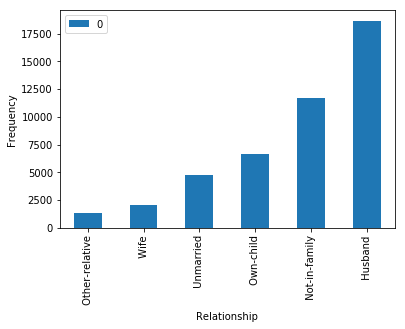

In [26]:
# Relationship 
re=pd.DataFrame(adult_red2.groupby('Relationship').size())
re=re.sort_values(by=[0])
print(re.head(10))
re.plot(kind='bar')
#plt.ylim(0, 1000)
plt.ylabel('Frequency')

                       0
Occupation              
 Armed-Forces         14
 Priv-house-serv     232
 Protective-serv     976
 Tech-support       1420
 Farming-fishing    1480
 Handlers-cleaners  2046
 Transport-moving   2316
 Machine-op-inspct  2970
 Other-service      4808
 Sales              5408
                       0
Occupation              
 Farming-fishing    1480
 Handlers-cleaners  2046
 Transport-moving   2316
 Machine-op-inspct  2970
 Other-service      4808
 Sales              5408
 Adm-clerical       5540
 Exec-managerial    5984
 Prof-specialty     6008
 Craft-repair       6020


Text(0,0.5,'Frequency')

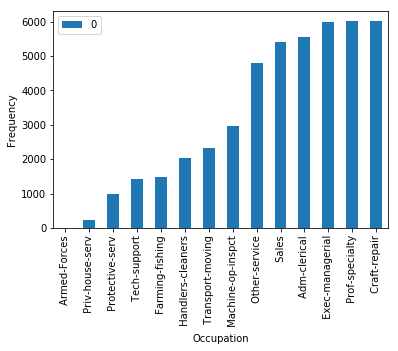

In [27]:
# Occupation
oc=pd.DataFrame(adult_red2.groupby('Occupation').size())
oc=oc.sort_values(by=[0])
print(oc.head(10))
print(oc.tail(10))
oc.plot(kind='bar')
#plt.ylim(0, 1000)
plt.ylabel('Frequency')

                            0
Marital Status               
 Married-AF-spouse         32
 Married-spouse-absent    552
 Widowed                 1277
 Separated               1411
 Divorced                6297
 Never-married          14598
 Married-civ-spouse     21055


Text(0,0.5,'Frequency')

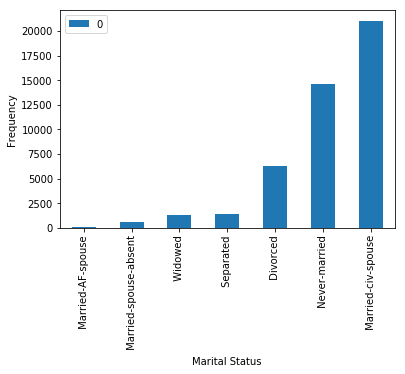

In [28]:
# Marital Status 
ms=pd.DataFrame(adult_red2.groupby('Marital Status').size())
ms=ms.sort_values(by=[0])
print(ms.head(10))
ms.plot(kind='bar')
plt.ylabel('Frequency')

                       0
workclass               
 Without-pay          21
 Federal-gov        1406
 Self-emp-inc       1646
 State-gov          1946
 Local-gov          3100
 Self-emp-not-inc   3796
 Private           33307
                       0
workclass               
 Without-pay          21
 Federal-gov        1406
 Self-emp-inc       1646
 State-gov          1946
 Local-gov          3100
 Self-emp-not-inc   3796
 Private           33307


Text(0,0.5,'Frequency')

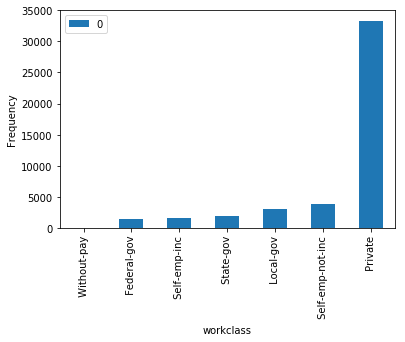

In [29]:
#'workclass','Marital Status','Occupation','Relationship','Race','Sex
# Workclass 
wc=pd.DataFrame(adult_red2.groupby('workclass').size())
wc=wc.sort_values(by=[0])
print(wc.head(10))
print(wc.tail(10))
wc.plot(kind='bar')
#plt.ylim(0, 1000)
plt.ylabel('Frequency')

                              0
Native Country                 
 Holand-Netherlands           1
 Hungary                     18
 Honduras                    19
 Scotland                    20
 Laos                        21
 Outlying-US(Guam-USVI-etc)  22
 Yugoslavia                  23
 Trinadad&Tobago             26
 Cambodia                    26
 Hong                        28
                    0
Native Country       
 England          119
 Cuba             133
 India            147
 El-Salvador      147
 Canada           163
 Puerto-Rico      175
 Germany          193
 Philippines      283
 Mexico           903
 United-States  41292


Text(0,0.5,'Frequency')

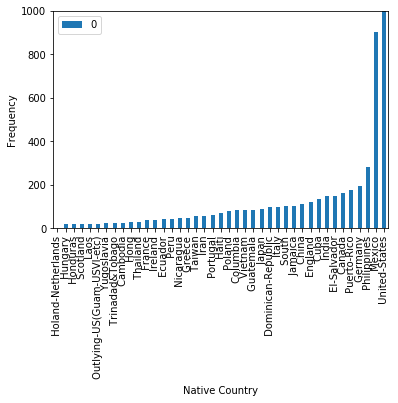

In [30]:
# Country 
ctry_income=pd.DataFrame(adult_red2.groupby('Native Country').size())
ctry_income=ctry_income.sort_values(by=[0])
print(ctry_income.head(10))
print(ctry_income.tail(10))
ctry_income.plot(kind='bar')
plt.ylim(0, 1000)
plt.ylabel('Frequency')
# Over 90% of Rows come from United States
# Limited Y to show countries other than US

## Test/Train

In [133]:
#Train/Test Split (70/30 since dataset is large)
features_train, features_test, target_train, target_test = train_test_split(
    result_red.iloc[:,1:].values, result_red.iloc[:,0].values, test_size=0.30, random_state=0)
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(13567, 86)
(31655, 86)
(13567,)
(31655,)


In [75]:
import numpy as np
from sklearn.decomposition import PCA
X = ft_red
pca = PCA(n_components=20)
pca1 = pca.fit(X)
pca2 = PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_)  


[9.99999972e-01 1.55114324e-08 1.17527539e-08 5.42486826e-10
 6.31856722e-11 2.63695434e-11 1.99024064e-11 1.71014749e-11
 1.51398349e-11 1.25948156e-11 1.12558943e-11 1.05173265e-11
 9.98249800e-12 9.90829993e-12 7.90816323e-12 7.67666354e-12
 7.29912064e-12 6.37968933e-12 5.40071511e-12 4.92063383e-12]
[7.61296858e+06 9.48156433e+02 8.25322839e+02 1.77316292e+02
 6.05150433e+01 3.90935714e+01 3.39630620e+01 3.14826170e+01
 2.96220161e+01 2.70177980e+01 2.55413616e+01 2.46891831e+01
 2.40532441e+01 2.39636857e+01 2.14087769e+01 2.10930944e+01
 2.05678698e+01 1.92288720e+01 1.76921119e+01 1.68874691e+01]


In [77]:
fit1 = pca.fit_transform(X, y=None)

In [83]:
fit_ft_red = pd.DataFrame(fit1)

# Models

## KNN

In [153]:
## KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh_knn = neigh.fit(features_train, target_train) 
target_predicted_knn = neigh_knn.predict(features_test)

### Grid Search KNN = 1-15

In [150]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
#param_grid = {"alpha": [.01,.1, .5, 1, 2]}
param_grid={"n_neighbors": [10,15,1]} #this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"n_neighbors": [10,15,1]} #this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(neigh, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(features_train, target_train)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)   

Grid Scores {'mean_fit_time': array([0.39158006, 0.29427896, 0.35398669]), 'std_fit_time': array([0.04444108, 0.01193023, 0.10042431]), 'mean_score_time': array([0.3574573 , 0.29859176, 0.23447514]), 'std_score_time': array([0.03864091, 0.01018427, 0.01991871]), 'param_n_neighbors': masked_array(data=[10, 15, 1],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_neighbors': 10}, {'n_neighbors': 15}, {'n_neighbors': 1}], 'split0_test_score': array([0.7432091 , 0.74115603, 0.68351232]), 'split1_test_score': array([0.73653451, 0.73748223, 0.6765124 ]), 'split2_test_score': array([0.74016743, 0.73606065, 0.67682831]), 'split3_test_score': array([0.74222082, 0.73779814, 0.67619649]), 'split4_test_score': array([0.73680885, 0.73665087, 0.65908373]), 'mean_test_score': array([0.73978834, 0.73782973, 0.67442742]), 'std_test_score': array([0.00272864, 0.00177239, 0.00813856]), 'rank_test_score': array([1, 2, 3], dtype=int32), 'split0_train

In [154]:
print("KNN Accuracy Score", accuracy_score(target_test, target_predicted_knn))
print("Classification Report")
print(classification_report(target_test, target_predicted_knn))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_knn))

KNN Accuracy Score 0.7444534532321073
Classification Report
             precision    recall  f1-score   support

          0       0.76      0.96      0.85     10258
          1       0.39      0.08      0.13      3309

avg / total       0.67      0.74      0.68     13567

Confusion Matrix
[[9835  423]
 [3044  265]]


In [155]:
#verify KNN with Cross Validation for KNN = 10
scores = cross_val_score(neigh_knn, features_train, target_train, cv=5)
print("Cross Validation Score for each K",scores)
scores.mean() 

Cross Validation Score for each K [0.7432091  0.73653451 0.74016743 0.74222082 0.73680885]


0.7397881408861193

### Running KNN through 1-10, and then through 10-15 resulted in most optimized model of KNN=10.

## Random Forest

In [185]:
# Random Forest N=10
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators = 10)
rf_fit = rf.fit(features_train, target_train)
target_predicted_rf = rf_fit.predict(features_test)
print("RF Accuracy Score N=10", accuracy_score(target_test, target_predicted_rf))
print("Classification Report")
print(classification_report(target_test, target_predicted_rf))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))

RF Accuracy Score N=10 0.8140340532173657
Classification Report
             precision    recall  f1-score   support

          0       0.82      0.96      0.89     10258
          1       0.75      0.36      0.49      3309

avg / total       0.80      0.81      0.79     13567

Confusion Matrix
[[9852  406]
 [2117 1192]]


In [182]:
# Random Forest N=100
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators = 100)
rf_fit = rf.fit(features_train, target_train)
target_predicted_rf = rf_fit.predict(features_test)
print("RF Accuracy Score N=100", accuracy_score(target_test, target_predicted_rf))
print("Classification Report")
print(classification_report(target_test, target_predicted_rf))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))

RF Accuracy Score N=100 0.8100538070317682
Classification Report
             precision    recall  f1-score   support

          0       0.81      0.97      0.89     10258
          1       0.78      0.31      0.44      3309

avg / total       0.80      0.81      0.78     13567

Confusion Matrix
[[9965  293]
 [2284 1025]]


In [183]:
# Random Forest N=500
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=4, random_state=0, n_estimators = 500)
rf_fit = rf.fit(features_train, target_train)
target_predicted_rf = rf_fit.predict(features_test)
print("RF Accuracy Score N=500", accuracy_score(target_test, target_predicted_rf))
print("Classification Report")
print(classification_report(target_test, target_predicted_rf))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_rf))

RF Accuracy Score N=500 0.8086533500405395
Classification Report
             precision    recall  f1-score   support

          0       0.81      0.97      0.88     10258
          1       0.78      0.30      0.43      3309

avg / total       0.80      0.81      0.77     13567

Confusion Matrix
[[9979  279]
 [2317  992]]


In [186]:
#verify RF with Cross Validation on N=10
scores = cross_val_score(rf_fit, features_train, target_train, cv=5)
print("Cross Validation Score",scores)
scores.mean() 

Cross Validation Score for each K [0.81238155 0.80666561 0.80808719 0.808719   0.81169036]


0.8095087445524983

## Decision Tree

In [187]:
## Decision Tree Max Depth = 5
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(max_depth=5, class_weight="balanced")
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)
print("DT Accuracy Score Max Depth = 5", accuracy_score(target_test, target_predicted_dt))
print("Classification Report")
print(classification_report(target_test, target_predicted_dt))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DT Accuracy Score Max Depth = 5 0.7708410112773642
Classification Report
             precision    recall  f1-score   support

          0       0.94      0.74      0.83     10258
          1       0.52      0.86      0.65      3309

avg / total       0.84      0.77      0.79     13567

Confusion Matrix
[[7623 2635]
 [ 474 2835]]


In [190]:
## Decision Tree Max Depth = 15
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(max_depth=15, class_weight="balanced")
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)
print("DT Accuracy Score Max Depth = 15", accuracy_score(target_test, target_predicted_dt))
print("Classification Report")
print(classification_report(target_test, target_predicted_dt))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=15, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DT Accuracy Score Max Depth = 15 0.7800545441143952
Classification Report
             precision    recall  f1-score   support

          0       0.92      0.77      0.84     10258
          1       0.53      0.80      0.64      3309

avg / total       0.83      0.78      0.79     13567

Confusion Matrix
[[7929 2329]
 [ 655 2654]]


In [189]:
## Decision Tree Max Depth = none
from sklearn import tree 
clf_dt = tree.DecisionTreeClassifier(class_weight="balanced")
#Call up the model to see the parameters you can tune (and their default setting)
print(clf_dt)
#Fit clf to the training data
clf_dt = clf_dt.fit(features_train, target_train)
#Predict clf DT model again test data
target_predicted_dt = clf_dt.predict(features_test)
print("DT Accuracy Score Max Depth = none", accuracy_score(target_test, target_predicted_dt))
print("Classification Report")
print(classification_report(target_test, target_predicted_dt))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_dt))

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
DT Accuracy Score Max Depth = none 0.7782855458096852
Classification Report
             precision    recall  f1-score   support

          0       0.86      0.85      0.85     10258
          1       0.54      0.56      0.55      3309

avg / total       0.78      0.78      0.78     13567

Confusion Matrix
[[8701 1557]
 [1451 1858]]


In [191]:
#verify DT with Cross Validation for Max Depth = 15
scores = cross_val_score(clf_dt, features_train, target_train, cv=5)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.77684776 0.78123519 0.76512399 0.77933976 0.76729858]


0.7739690554674072

## SVM Linear

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(features_train)
# Now apply the transformations to the data:
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [142]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=0.1, class_weight='balanced', max_iter = 100)
clf_linSVC.fit(X_train, target_train)
predicted_SVC=clf_linSVC.predict(X_test)
expected = target_test
# summarize the fit of the model
print('C=0.1')
print(classification_report(expected, predicted_SVC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVC))
print(accuracy_score(expected,predicted_SVC))

C=0.1
             precision    recall  f1-score   support

         No       0.93      0.74      0.82     10258
        Yes       0.50      0.83      0.63      3309

avg / total       0.83      0.76      0.77     13567

[[7554 2704]
 [ 558 2751]]
0.7595636470848383


In [145]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=0.5, class_weight='balanced', max_iter = 100)
clf_linSVC.fit(X_train, target_train)
predicted_SVC=clf_linSVC.predict(X_test)
expected = target_test
# summarize the fit of the model
print('C=0.5')
print(classification_report(expected, predicted_SVC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVC))
print(accuracy_score(expected,predicted_SVC))

C=0.5
             precision    recall  f1-score   support

         No       0.93      0.74      0.82     10258
        Yes       0.50      0.83      0.63      3309

avg / total       0.83      0.76      0.77     13567

[[7540 2718]
 [ 563 2746]]
0.7581631900936094


In [144]:
from sklearn.svm import LinearSVC
clf_linSVC=LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=1.0, class_weight='balanced', max_iter = 100)
clf_linSVC.fit(X_train, target_train)
predicted_SVC=clf_linSVC.predict(X_test)
expected = target_test
# summarize the fit of the model
print('C=1.0')
print(classification_report(expected, predicted_SVC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_SVC))
print(accuracy_score(expected,predicted_SVC))

C=1.0
             precision    recall  f1-score   support

         No       0.93      0.74      0.82     10258
        Yes       0.50      0.81      0.62      3309

avg / total       0.82      0.76      0.77     13567

[[7576 2682]
 [ 613 2696]]
0.757131274415862


In [146]:
#verify SVM Linear with Cross Validation C = 0.5
scores = cross_val_score(clf_linSVC, X_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.76595073 0.75584334 0.78300695 0.76247631 0.76089703 0.76531901
 0.78041074 0.78167457 0.75481833 0.76011378]


0.7670510780541232

### SVM Linear, 76% Accuracy, Verified with Cross Validation.  

## Extra Trees

In [213]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(max_depth=3,
                         n_estimators=10,class_weight='balanced')
#print(xdt)
xdt2=xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
expected = target_test
print("Extra Trees", accuracy_score(expected,predicted_xdt))
print(classification_report(expected, predicted_xdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_xdt))

Extra Trees 0.7182870199749392
             precision    recall  f1-score   support

         No       0.92      0.69      0.79     10258
        Yes       0.46      0.81      0.58      3309

avg / total       0.81      0.72      0.74     13567

[[7059 3199]
 [ 623 2686]]


In [214]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(max_depth=10,
                         n_estimators=10,class_weight='balanced')
#print(xdt)
xdt2=xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
expected = target_test
print("Extra Trees", accuracy_score(expected,predicted_xdt))
print(classification_report(expected, predicted_xdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_xdt))

Extra Trees 0.7364929608609125
             precision    recall  f1-score   support

         No       0.93      0.70      0.80     10258
        Yes       0.48      0.84      0.61      3309

avg / total       0.82      0.74      0.75     13567

[[7198 3060]
 [ 515 2794]]


In [215]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(
                         n_estimators=10,class_weight='balanced')
#print(xdt)
xdt2=xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
expected = target_test
print("Extra Trees", accuracy_score(expected,predicted_xdt))
print(classification_report(expected, predicted_xdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_xdt))

Extra Trees 0.8078425591508808
             precision    recall  f1-score   support

         No       0.85      0.90      0.88     10258
        Yes       0.63      0.52      0.57      3309

avg / total       0.80      0.81      0.80     13567

[[9233 1025]
 [1582 1727]]


In [216]:
from sklearn.ensemble import ExtraTreesClassifier
xdt = ExtraTreesClassifier(
                         n_estimators=100,class_weight='balanced')
#print(xdt)
xdt2=xdt.fit(features_train, target_train)
predicted_xdt=xdt.predict(features_test)
expected = target_test
print("Extra Trees", accuracy_score(expected,predicted_xdt))
print(classification_report(expected, predicted_xdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_xdt))

Extra Trees 0.8145500110562394
             precision    recall  f1-score   support

         No       0.87      0.89      0.88     10258
        Yes       0.63      0.57      0.60      3309

avg / total       0.81      0.81      0.81     13567

[[9160 1098]
 [1418 1891]]


In [217]:
#verify Extra Trees with Cross Validation max_depth = none, n_estimators = 100
scores = cross_val_score(xdt2, features_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.80511687 0.81711939 0.80732786 0.80101074 0.8041693  0.80953885
 0.81042654 0.81105845 0.80600316 0.81068268]


0.8082453838759307

### Extra Trees improves from 71% to 80% from removing max depth parameter.  Slight improvement ~1% seen from increasing estimators from 10->100.  CV Confirms validity of model.  OK to productionalize.  

## Gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.7, max_depth=1, random_state=0)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))

Gradient Boost Accuracy 0.7434215375543598
             precision    recall  f1-score   support

         No       0.83      0.82      0.83     10258
        Yes       0.47      0.49      0.48      3309

avg / total       0.75      0.74      0.75     13567

[[8453 1805]
 [1676 1633]]


In [219]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=10, learning_rate=0.5, max_depth=1, random_state=0)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))

Gradient Boost Accuracy 0.8213311712242942
             precision    recall  f1-score   support

         No       0.83      0.95      0.89     10258
        Yes       0.74      0.41      0.53      3309

avg / total       0.81      0.82      0.80     13567

[[9787  471]
 [1953 1356]]


In [226]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=10, learning_rate=0.6, max_depth=1, random_state=0)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))

Gradient Boost Accuracy 0.8245006265202329
             precision    recall  f1-score   support

         No       0.85      0.93      0.89     10258
        Yes       0.69      0.50      0.58      3309

avg / total       0.81      0.82      0.81     13567

[[9519  739]
 [1642 1667]]


In [229]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=10, learning_rate=0.6, random_state=0)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))

Gradient Boost Accuracy 0.8337878676199602
             precision    recall  f1-score   support

         No       0.86      0.93      0.89     10258
        Yes       0.71      0.54      0.61      3309

avg / total       0.82      0.83      0.83     13567

[[9539  719]
 [1536 1773]]


In [230]:
from sklearn.ensemble import GradientBoostingClassifier
clf_GBC = GradientBoostingClassifier(n_estimators=10, learning_rate=0.6, random_state=0, loss='exponential')
#loss : {‘deviance’, ‘exponential’}, optional (default=’deviance’)
clf_GBC.fit(features_train, target_train)
predicted_GBC=clf_GBC.predict(features_test)
expected = target_test
print("Gradient Boost Accuracy", accuracy_score(expected,predicted_GBC))
print(classification_report(expected, predicted_GBC,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_GBC))

Gradient Boost Accuracy 0.8344512419842264
             precision    recall  f1-score   support

         No       0.87      0.92      0.89     10258
        Yes       0.69      0.58      0.63      3309

avg / total       0.83      0.83      0.83     13567

[[9387  871]
 [1375 1934]]


In [231]:
#verify Gradient Boosting with Cross Validation 
scores = cross_val_score(clf_GBC, features_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.83607075 0.8335439  0.84017688 0.82596336 0.82943778 0.82943778
 0.82338073 0.84960506 0.83064771 0.82553729]


0.8323801234390537

### Best Gradient Boosting, Learning Rate 0.6, Exponential Loss, No Max Depth.  High Accuracy.  CV Passes.  Could Productionalize.  

## Adaboost

In [232]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8354094493992776
             precision    recall  f1-score   support

         No       0.88      0.91      0.89     10258
        Yes       0.68      0.62      0.65      3309

avg / total       0.83      0.84      0.83     13567

[[9285  973]
 [1260 2049]]


In [233]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=20)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8323137023660352
             precision    recall  f1-score   support

         No       0.88      0.90      0.89     10258
        Yes       0.67      0.61      0.64      3309

avg / total       0.83      0.83      0.83     13567

[[9267  991]
 [1284 2025]]


In [235]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                         algorithm="SAMME",
                         n_estimators=20)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8106434731333383
             precision    recall  f1-score   support

         No       0.86      0.90      0.88     10258
        Yes       0.63      0.55      0.58      3309

avg / total       0.80      0.81      0.81     13567

[[9189 1069]
 [1500 1809]]


In [239]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(
                         algorithm="SAMME",
                         n_estimators=20)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8225842116901305
             precision    recall  f1-score   support

         No       0.86      0.91      0.89     10258
        Yes       0.66      0.55      0.60      3309

avg / total       0.81      0.82      0.82     13567

[[9329  929]
 [1478 1831]]


In [240]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8306921205867178
             precision    recall  f1-score   support

         No       0.86      0.92      0.89     10258
        Yes       0.69      0.55      0.61      3309

avg / total       0.82      0.83      0.82     13567

[[9462  796]
 [1501 1808]]


In [241]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=20, learning_rate=2)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.3903589592393307
             precision    recall  f1-score   support

         No       0.71      0.32      0.44     10258
        Yes       0.22      0.60      0.32      3309

avg / total       0.59      0.39      0.42     13567

[[3310 6948]
 [1323 1986]]


In [242]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=20, learning_rate=1)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8323137023660352
             precision    recall  f1-score   support

         No       0.88      0.90      0.89     10258
        Yes       0.67      0.61      0.64      3309

avg / total       0.83      0.83      0.83     13567

[[9267  991]
 [1284 2025]]


In [244]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=20, learning_rate=0.7)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8297339131716666
             precision    recall  f1-score   support

         No       0.87      0.91      0.89     10258
        Yes       0.68      0.57      0.62      3309

avg / total       0.82      0.83      0.82     13567

[[9356  902]
 [1408 1901]]


In [252]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
bdt = AdaBoostClassifier(RandomForestClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=20, learning_rate=0.7)
bdt.fit(features_train, target_train)
predicted_bdt=bdt.predict(features_test)
expected = target_test
print("Adaboost Accuracy", accuracy_score(expected,predicted_bdt))
print(classification_report(expected, predicted_bdt,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bdt))

Adaboost Accuracy 0.8301024544851477
             precision    recall  f1-score   support

         No       0.87      0.91      0.89     10258
        Yes       0.68      0.57      0.62      3309

avg / total       0.82      0.83      0.82     13567

[[9364  894]
 [1411 1898]]


In [245]:
#verify AdaBoost with Cross Validation 
scores = cross_val_score(bdt, features_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.82154138 0.82691093 0.83196462 0.8199621  0.82375237 0.82185723
 0.82180095 0.83096367 0.82685624 0.82648546]


0.8252094943706874

### Best Model, Decision Tree Base Learner, Learning Rate = 1, Estimators = 20, Max Depth = 3

#### Little to no difference between Decision Tree and Random Forest.

# Stacking

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#Three Models RF, NB, BDT
clf1 = RandomForestClassifier(random_state=1)
clf_LR = LogisticRegression()
clf2 = GaussianNB()
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=200)
eclf2 = VotingClassifier(estimators=[('rf', clf1), ('gnb', clf2), ('bdt', bdt)], voting='hard')
for MV, label in zip([clf1, clf2, bdt, eclf2, clf_LR], ['Random Forest', 'naive Bayes', 'AdaBoost Decision Tree', 'Ensemble','Logistic Regression']):

    scores2 = cross_val_score(MV, features_train, target_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores2.mean(), scores2.std(), label))

Accuracy: 0.81 (+/- 0.00) [Random Forest]
Accuracy: 0.78 (+/- 0.00) [naive Bayes]
Accuracy: 0.83 (+/- 0.00) [AdaBoost Decision Tree]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

Accuracy: 0.82 (+/- 0.00) [Ensemble]
Accuracy: 0.75 (+/- 0.00) [Logistic Regression]


In [182]:
eclf2.fit(features_train, target_train)
predictions = eclf2.predict(features_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy", accuracy_score(target_test,predictions))
print(classification_report(target_test,predictions))
print(confusion_matrix(target_test,predictions))

Accuracy 0.831060661900199
             precision    recall  f1-score   support

          0       0.85      0.94      0.89     10258
          1       0.72      0.50      0.59      3309

avg / total       0.82      0.83      0.82     13567

[[9631  627]
 [1665 1644]]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [183]:
#verify Stacking with Cross Validation 
scores = cross_val_score(eclf2, features_train, target_train, cv=3)
print("Cross Validation Score",scores)
scores.mean()  

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Cross Validation Score [0.82657316 0.82354056 0.82447161]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8248617788606919

### Stacking 83% Accuracy, CV Verified

# Bagging

In [255]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier # base estimator is base learner algorithm.  
from sklearn.neighbors import KNeighborsClassifier
clf_bag = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features=0.5)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,predicted_bag))
print(classification_report(expected, predicted_bag,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bag))



BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Bagging Accuracy 0.7655340163632344
             precision    recall  f1-score   support

         No       0.77      0.98      0.86     10258
        Yes       0.61      0.11      0.19      3309

avg / total       0.73      0.77      0.70     13567

[[10019   239]
 [ 2942   367]]


In [261]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier # base estimator is base learner algorithm.  I.E. is you say Decision tree you are making a random forest. 
clf_bag = BaggingClassifier(n_estimators=10, random_state=0)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,predicted_bag))
print(classification_report(expected, predicted_bag,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bag))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
         verbose=0, warm_start=False)
Bagging Accuracy 0.8143288862681507
             precision    recall  f1-score   support

         No       0.86      0.91      0.88     10258
        Yes       0.65      0.53      0.58      3309

avg / total       0.80      0.81      0.81     13567

[[9300  958]
 [1561 1748]]


In [257]:
#Bagging Classifer
from sklearn.ensemble import BaggingClassifier # base estimator is base learner algorithm.  
from sklearn.linear_model import LogisticRegression
clf_bag = BaggingClassifier(LogisticRegression(), max_samples = 0.5, max_features=0.5)
print(clf_bag)
clf_bag.fit(features_train, target_train)
predicted_bag=clf_bag.predict(features_test)
expected = target_test
print("Bagging Accuracy", accuracy_score(expected,predicted_bag))
print(classification_report(expected, predicted_bag,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_bag))

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
Bagging Accuracy 0.7851404142404363
             precision    recall  f1-score   support

         No       0.79      0.98      0.87     10258
        Yes       0.73      0.19      0.30      3309

avg / total       0.77      0.79      0.73     13567

[[10018   240]
 [ 2675   634]]


In [262]:
#verify Bagging with Cross Validation #DT Method
scores = cross_val_score(clf_bag, features_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.81238155 0.80859128 0.8149084  0.81301327 0.80859128 0.79595704
 0.80884676 0.8192733  0.82053712 0.81352718]


0.8115627198846986

### Best Bagging method used DT Base Learner, with Default Variables.  CV Verifies it is Ready for Production.  

# SVM RBF (Takes a long time to run)

In [167]:
# Reducing Rows for RBF
ft = pd.DataFrame(features_train)
ft_red = ft[:5000]
ft_red.shape
tt = pd.DataFrame(target_train)
tt_red = tt[:5000]
tt_red.shape
ftest = pd.DataFrame(features_test)
ftest_red = ftest[:5000]
ftest_red.shape
#TIME NOTES
# 1000 Rows = 1.7 Sec
# 5000 Rows = 8.5 Sec
# 20,000 Rows = 198 Sec
# Settled on 5000 Rows for the sake of sanity.  
# POLY at 5,000 takes...

(5000, 86)

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(ft_red)
# Now apply the transformations to the data:
X_train_RBF = scaler.transform(ft_red)
X_test_RBF = scaler.transform(ftest_red)

In [169]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import svm, datasets
import time
start_time = time.clock()
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train_RBF, tt_red)
predicted_svm_rbf = rbf_svc.predict(X_test_RBF)
expected = tt_red
print("SVM RBF Accuracy", accuracy_score(expected,predicted_svm_rbf))
print(classification_report(expected, predicted_svm_rbf,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_svm_rbf))
print(time.clock() - start_time, "seconds")

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM RBF Accuracy 0.6958
             precision    recall  f1-score   support

         No       0.76      0.87      0.81      3810
        Yes       0.24      0.13      0.17      1190

avg / total       0.64      0.70      0.66      5000

[[3323  487]
 [1034  156]]
5.496807000000047 seconds


In [170]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import svm, datasets
import time
start_time = time.clock()
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X_train_RBF, tt_red)
predicted_svm_rbf = rbf_svc.predict(X_test_RBF)
expected = tt_red
print("SVM RBF Accuracy", accuracy_score(expected,predicted_svm_rbf))
print(classification_report(expected, predicted_svm_rbf,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_svm_rbf))
print(time.clock() - start_time, "seconds")

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM RBF Accuracy 0.6828
             precision    recall  f1-score   support

         No       0.76      0.84      0.80      3810
        Yes       0.25      0.17      0.20      1190

avg / total       0.64      0.68      0.66      5000

[[3213  597]
 [ 989  201]]
3.9995079999999916 seconds


In [178]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn import svm, datasets
import time
start_time = time.clock()
C = 0.5  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.3, C=C).fit(X_train_RBF, tt_red)
predicted_svm_rbf = rbf_svc.predict(X_test_RBF)
expected = tt_red
print("SVM RBF Accuracy", accuracy_score(expected,predicted_svm_rbf))
print(classification_report(expected, predicted_svm_rbf,target_names=['No', 'Yes']))
print(confusion_matrix(expected, predicted_svm_rbf))
print(time.clock() - start_time, "seconds")

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM RBF Accuracy 0.7
             precision    recall  f1-score   support

         No       0.76      0.88      0.82      3810
        Yes       0.24      0.12      0.16      1190

avg / total       0.64      0.70      0.66      5000

[[3354  456]
 [1044  146]]
4.588366999999948 seconds


In [177]:
#verify SVM RBF with Cross Validation C=0.5 gamma=0.3
scores = cross_val_score(rbf_svc, X_train_RBF, tt_red, cv=5)
print("Cross Validation Score",scores)
scores.mean()  

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Cross Validation Score [0.815 0.808 0.818 0.815 0.821]


0.8154

### SVM RBF - Best accuracy 76%, Verified with CV

# Stochastic Gradient Descent

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(features_train)
# Now apply the transformations to the data:
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [148]:
## SGD
from sklearn.linear_model import SGDClassifier 
clf_sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
clf_sgd = clf_sgd.fit(X_train, target_train)
target_predicted_sgd = clf_sgd.predict(X_test)
print("SGD Accuracy Score", accuracy_score(target_test, target_predicted_sgd))
print("Classification Report")
print(classification_report(target_test, target_predicted_sgd))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_sgd))

SGD Accuracy Score 0.7919215744084912
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.84      0.86     10258
          1       0.56      0.65      0.61      3309

avg / total       0.80      0.79      0.80     13567

Confusion Matrix
[[8579 1679]
 [1144 2165]]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [153]:
## SGD
from sklearn.linear_model import SGDClassifier 
clf_sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.5,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
clf_sgd = clf_sgd.fit(X_train, target_train)
target_predicted_sgd = clf_sgd.predict(X_test)
print("SGD Accuracy Score", accuracy_score(target_test, target_predicted_sgd))
print("Classification Report")
print(classification_report(target_test, target_predicted_sgd))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_sgd))

SGD Accuracy Score 0.7908159504680474
Classification Report
             precision    recall  f1-score   support

          0       0.84      0.89      0.87     10258
          1       0.59      0.49      0.53      3309

avg / total       0.78      0.79      0.78     13567

Confusion Matrix
[[9109 1149]
 [1689 1620]]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [150]:
## SGD
from sklearn.linear_model import SGDClassifier 
clf_sgd = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.9, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
clf_sgd = clf_sgd.fit(X_train, target_train)
target_predicted_sgd = clf_sgd.predict(X_test)
print("SGD Accuracy Score", accuracy_score(target_test, target_predicted_sgd))
print("Classification Report")
print(classification_report(target_test, target_predicted_sgd))
print("Confusion Matrix")
print(confusion_matrix(target_test, target_predicted_sgd))

SGD Accuracy Score 0.7722414682685929
Classification Report
             precision    recall  f1-score   support

          0       0.90      0.79      0.84     10258
          1       0.52      0.73      0.61      3309

avg / total       0.81      0.77      0.78     13567

Confusion Matrix
[[8071 2187]
 [ 903 2406]]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [155]:
#verify SGD with Cross Validation
scores = cross_val_score(clf_sgd, X_train, target_train, cv=10)
print("Cross Validation Score",scores)
scores.mean()  

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/hom

Cross Validation Score [0.7883765  0.78963992 0.79879975 0.7804801  0.77037271 0.77511055
 0.78388626 0.78830964 0.79873618 0.79361568]


/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7867327278402472

### SGD 79% Accurate, CV Verified.  

# Artificial Neural Network

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(features_train)
# Now apply the transformations to the data:
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)

/Users/homerkay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [138]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,5))
print(mlp)
mlp.fit(X_train,target_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy", accuracy_score(target_test,predictions))
print(classification_report(target_test,predictions))
print(confusion_matrix(target_test,predictions))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Accuracy 0.8359254072381515
             precision    recall  f1-score   support

          0       0.88      0.91      0.89     10258
          1       0.69      0.60      0.64      3309

avg / total       0.83      0.84      0.83     13567

[[9345  913]
 [1313 1996]]


In [136]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(20,10,5))
print(mlp)
mlp.fit(X_train,target_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy", accuracy_score(target_test,predictions))
print(classification_report(target_test,predictions))
print(confusion_matrix(target_test,predictions))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 10, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Accuracy 0.8359991155008476
             precision    recall  f1-score   support

          0       0.87      0.92      0.89     10258
          1       0.70      0.57      0.63      3309

avg / total       0.83      0.84      0.83     13567

[[9458  800]
 [1425 1884]]


In [137]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,10))
print(mlp)
mlp.fit(X_train,target_train)
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print("Accuracy", accuracy_score(target_test,predictions))
print(classification_report(target_test,predictions))
print(confusion_matrix(target_test,predictions))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
Accuracy 0.8327559519422127
             precision    recall  f1-score   support

          0       0.87      0.92      0.89     10258
          1       0.69      0.56      0.62      3309

avg / total       0.82      0.83      0.83     13567

[[9434  824]
 [1445 1864]]


In [140]:
#verify ANN with Cross Validation Hidden 10,5 layers
scores = cross_val_score(mlp, X_train, target_train, cv=5)
print("Cross Validation Score",scores)
scores.mean()  

Cross Validation Score [0.83686039 0.8302006  0.82640973 0.83446533 0.83096367]


0.8317799432403545

### ANN Accuracy 83%, CV Verified